In [3]:
import sqlite3
import pandas as pd

In [4]:
# Connect to the SQLite database
conn = sqlite3.connect("covid_data.db")

# Load the full dataset into a DataFrame
df = pd.read_sql_query("SELECT * FROM daily_data",conn)

# Show shape and top rows
print(df.shape)
df

(231, 11)


,country,cases,todayCases,deaths,todayDeaths,recovered,todayRecovered,active,critical,population,fetch_date
0,Afghanistan,234174,0,7996,0,211080,0,15098,0,40754388,2025-07-18
1,Albania,334863,0,3605,0,330233,0,1025,0,2866374,2025-07-18
2,Algeria,272010,0,6881,0,183061,0,82068,0,45350148,2025-07-18
3,Andorra,48015,0,165,0,0,0,47850,0,77463,2025-07-18
4,Angola,107327,0,1937,0,103419,0,1971,0,35027343,2025-07-18
...,...,...,...,...,...,...,...,...,...,...,...
226,Wallis and Futuna,3550,0,8,0,438,0,3104,0,10982,2025-07-18
227,Western Sahara,10,0,1,0,9,0,0,0,626161,2025-07-18
228,Yemen,11945,0,2159,0,9124,0,662,0,31154867,2025-07-18
229,Zambia,349304,0,4069,0,341316,0,3919,0,19470234,2025-07-18


In [5]:
# Overview of data types and non-null counts
df.info()

# Basic statistics
df.describe()

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   country         231 non-null    object
 1   cases           231 non-null    int64 
 2   todayCases      231 non-null    int64 
 3   deaths          231 non-null    int64 
 4   todayDeaths     231 non-null    int64 
 5   recovered       231 non-null    int64 
 6   todayRecovered  231 non-null    int64 
 7   active          231 non-null    int64 
 8   critical        231 non-null    int64 
 9   population      231 non-null    int64 
 10  fetch_date      231 non-null    object
dtypes: int64(9), object(2)
memory usage: 20.0+ KB


country           0
cases             0
todayCases        0
deaths            0
todayDeaths       0
recovered         0
todayRecovered    0
active            0
critical          0
population        0
fetch_date        0
dtype: int64

In [6]:
# Remove duplicate rows if any
df = df.drop_duplicates()

In [7]:
df.shape

(231, 11)

C:\Users\steff\AppData\Local\Temp\ipykernel_5492\1163196345.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10, x='country', y='cases', palette='Reds_r')


AttributeError: 'str' object has no attribute 'date'

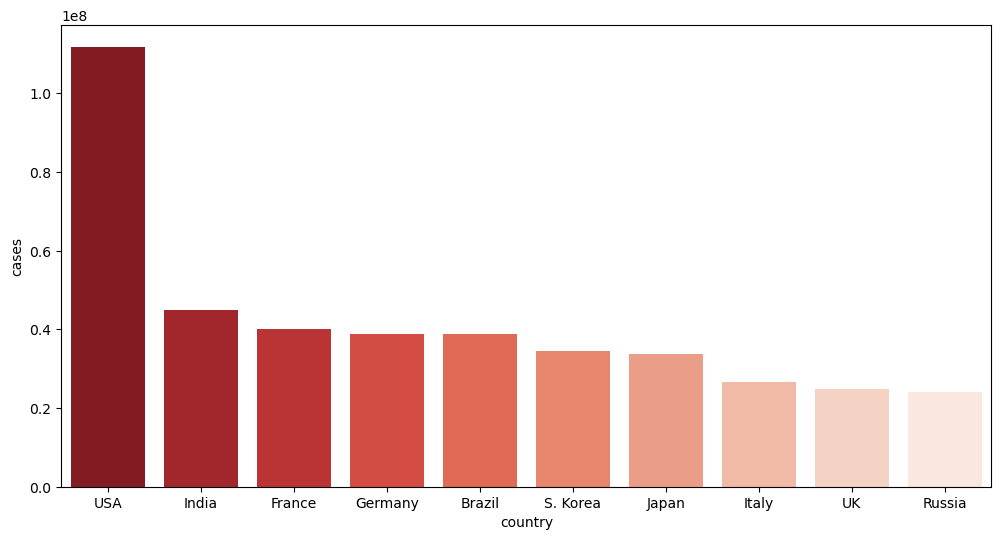

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get latest date
latest_date = df['fetch_date'].max()

# Filter today's data
today_df = df[df['fetch_date'] == latest_date]

# Top 10 countries by cases
top10 = today_df.sort_values('cases', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top10, x='country', y='cases', palette='Reds_r')
plt.title(f"Top 10 Countries by Total Cases ({latest_date.date()})")
plt.xlabel("Country")
plt.ylabel("Total Cases")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [9]:

# Save to Excel
df.to_excel("D:\Data\Projects\Covid data\covid_data_exported.xlsx", index=False)

print("Data exported successfully to 'covid_data_exported.xlsx'")

<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
C:\Users\steff\AppData\Local\Temp\ipykernel_5492\3843189579.py:2: SyntaxWarning: invalid escape sequence '\D'
  df.to_excel("D:\Data\Projects\Covid data\covid_data_exported.xlsx", index=False)


Data exported successfully to 'covid_data_exported.xlsx'
